Yes, including all structures will allow you to do better matching (more likely to find related structures); however, I believe, in the current set-up, this heavily biases the analysis to identify kinases with a lot of crystal structures (more likely to find among them one that is similar to one of protein of interest)
--> also maybe something to check? Compare rankings vs number of structures, or something like false positives vs number of structures, or min distance vs number of structures? --> though this can also show "true" (cor)relations (e.g., one that is similar to a lot of structures, is perhaps a common off target and therefore studied a lot)
Perhaps plot: x axis targets (sorted by increasing number of structures), y axis box plots (or just points) of unsigned ranking error: true rank - predicted rank. Hypotheses: for targets with a lot of structures, they will often be predicted too high, meaning the unsigned error will be higher  (as percentage? Difference number for different drugs)
Or perhaps go first per one drug; plot shapley-like plot: x axis the rank difference, center at 0. Then on y axis the targets, sorted by number of structures. Then barplots, binary coloring (positive/negative). Then you expect at the top a lot negative and bottom positive
Perhaps for cumulative; get some sort of (ranking?) Metric per drug? And then look at cummulative over drugs (is there mostly a correlation yes or no)

Regarding obtaining of apo structures; for validation, besides comparing structures with apo structures to simulated apo structures, you can also compare relaxed structures of different starting points (different crystal structures with different ligands)
--> check minimization vs dynamics?

Including ligands;
If 1; template docking, relax protein, calculate fingerprints for relaxed structures. (Compare to docking scores?)
If more ? --> only sub-panel of known off-targets? And see if similarly decreases for this ligand compared to baseline?
--> especially easy for datasets with 2 targets; just have to check for these 2 if distance increases for complex with ligand to test vs apo/some baseline (non-selective) ligand --> can try with volkamer set ? Cdk2 cdk9, ~20 ligands

In [3]:
#lets start by getting the dataframe with all structures
from pathlib import Path
from opencadd.databases.klifs import setup_remote
import pandas as pd


HERE = Path(_dh[-1])  # noqa: F821
DATA = HERE / "../../data/processed/"
structure_klifs_ids = pd.read_csv(
    DATA / "structure_klifs_ids_all.txt", squeeze=True, header=None
).to_list()
print(f"Number of structures: {len(structure_klifs_ids)}")
remote = setup_remote()
structures = remote.structures.by_structure_klifs_id(structure_klifs_ids)
pd.set_option("display.max_columns", 50)
structures_dfg_in = structures[structures["structure.dfg"] == "in"]
print(f"Number of structures with DFG in: {len(structures_dfg_in)}")
structures_dfg_in

Number of structures: 4690
Number of structures with DFG in: 4106


,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag
1,4,2rei,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGAGEFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,-,-,0,0,<NA>,<NA>,in,in,1.60,7.6,1,0,0.784,2.093,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.746799,63.102798,77.154900,<NA>,False
2,8,3miy,-,B,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,B49,-,5,0,<NA>,<NA>,in,in,1.67,6.4,4,0,0.845,2.052,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.728800,53.692200,46.623100,<NA>,False
3,9,4m0y,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,M0Y,M0Y,6,6,<NA>,<NA>,in,out,1.70,8.0,0,0,0.817,2.200,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.555901,59.358200,69.081596,<NA>,False
4,11,3qgw,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,PQC,-,8,0,<NA>,<NA>,in,out,2.10,7.2,2,0,0.829,2.126,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.781099,58.850201,57.749901,<NA>,False
5,12,4mf1,A,B,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,29Y,-,9,0,<NA>,<NA>,in,in,2.11,7.2,2,0,0.853,2.070,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.108801,55.024300,52.406502,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,13855,7ree,A,A,Human,436,JAK2,<NA>,<NA>,<NA>,QQLGKGNFGSVEMVAVKKLDFEREIEILKSLQDNIVKYKGVKLIME...,4LY,-,4085,0,<NA>,<NA>,in,in,1.38,8.0,0,0,0.783,2.093,<NA>,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,15.880600,50.247898,39.763199,<NA>,False
4686,13857,7n3u,-,A,Human,333,Wee1,<NA>,<NA>,<NA>,EKIGSGEFGSVFKYAIKRSNALREVYAHAVLGSHVVRYFSALIQNE...,05J,-,4086,0,<NA>,<NA>,in,in,2.65,8.0,0,0,0.777,2.116,<NA>,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,19.308500,63.620499,52.645802,<NA>,False
4687,13862,7ni6,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,AGS,-,38,0,<NA>,<NA>,in,in,2.80,7.2,0,0,1.540,3.176,<NA>,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.298500,73.256500,84.482002,<NA>,False
4688,13863,7ni5,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,UF8,-,4089,0,<NA>,<NA>,in,in,2.78,7.2,0,0,1.547,3.174,<NA>,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,20.552401,72.915901,83.977898,<NA>,False


In [236]:
structures_apo = structures[structures["ligand.expo_id"] == "-"]
structures_apo = structures_apo[structures_apo["ligand_allosteric.expo_id"] == "-"]
structures_apo

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag
1,4,2rei,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGAGEFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,-,-,0,0,<NA>,<NA>,in,in,1.600,7.6,1,0,0.784,2.093,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.746799,63.102798,77.154900,<NA>,False
34,93,3cc6,A,A,Human,424,PYK2,<NA>,<NA>,<NA>,RILGEGFFGEVYEVAVKTCKFMSEAVIMKNLDPHIVKLIGIWIIME...,-,-,0,0,<NA>,<NA>,in,in,1.600,8.0,0,0,0.819,2.238,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.798599,69.442802,66.524002,<NA>,False
36,95,3fzo,-,A,Human,424,PYK2,<NA>,<NA>,<NA>,RILGEGFFGEVYEVAVKTCKFMSEAVIMKNLDPHIVKLIGIWIIME...,-,-,0,0,<NA>,<NA>,in,in,2.200,8.0,0,0,0.817,2.257,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.936199,70.128502,68.387100,<NA>,False
42,108,1vzo,A,A,Human,49,MSK1,<NA>,<NA>,<NA>,KVLGTGAYGKVFLYAMKVLHTRTERQVLEHIRPFLVTLHYAHLILD...,-,-,0,0,<NA>,<NA>,in,out,1.800,7.2,0,0,0.869,2.501,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,13.259600,43.858601,71.250504,<NA>,False
47,120,1wak,-,A,Human,256,SRPK1,<NA>,<NA>,<NA>,RKLGWGHFSTVWLVAMKVVTALDEIRLLKSVREMVVQLLDDCMVFE...,-,-,0,0,<NA>,<NA>,in,in,1.730,8.0,0,0,0.788,2.132,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.103201,61.865200,28.445499,<NA>,False
48,122,4red,-,A,Human,117,AMPKa1,<NA>,<NA>,<NA>,DTLGVGTFGKVKVVAVKILKIRREIQNLKLFRPHIIKLYQVFMVME...,-,-,0,0,<NA>,<NA>,in,out,2.950,7.6,0,0,0.923,2.338,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,21.551399,71.301201,66.828102,<NA>,False
49,127,4jnw,A,A,Human,154,TTN,<NA>,<NA>,<NA>,EDLGRGEFGIVHRYMAKFVLVKKEISILNIARRNILHLHESVMIFE...,-,-,0,0,<NA>,<NA>,in,in,2.060,8.0,0,0,0.799,2.139,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.998501,63.483299,33.125000,<NA>,False
50,130,1tki,-,A,Human,154,TTN,<NA>,<NA>,<NA>,EDLGRGEFGIVHRYMAKFVLVKKEISILNIARRNILHLHESVMIFE...,-,-,0,0,<NA>,<NA>,in,in,2.000,8.0,0,0,0.799,2.136,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.867300,63.209099,33.749199,<NA>,False
56,146,3q52,-,A,Human,367,PAK1,<NA>,<NA>,<NA>,EKIGQGASGTVYTVAIRQMLIINEILVMRENKPNIVNYLDSWVVME...,-,-,0,0,<NA>,<NA>,in,in,1.800,8.0,0,0,0.773,2.103,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.524099,65.358803,34.371399,<NA>,False
61,160,1yhw,-,A,Human,367,PAK1,<NA>,<NA>,<NA>,EKIGQGASGTVYTVAIRQMLIINEILVMRENKPNIVNYLDSWVVME...,-,-,0,0,<NA>,<NA>,in,in,1.800,9.5,0,5,0.773,2.107,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.880100,66.206100,38.217602,<NA>,False


In [237]:
print(structures_apo['structure.dfg'].value_counts())
print(structures_apo['structure.ac_helix'].value_counts())

in          387
out          29
out-like     29
Name: structure.dfg, dtype: Int64
in     374
out     70
na       1
Name: structure.ac_helix, dtype: Int64


In [105]:
pd.set_option('display.max_rows', 500)
value_counts_df = pd.DataFrame(structures_dfg_in['kinase.klifs_name'].value_counts())
value_counts_df
#make this into a dict; key is the kinase name, value is the number of structures
kinase_to_num_structures = value_counts_df.to_dict()['kinase.klifs_name']
kinase_to_num_structures

{'CDK2': 410,
 'CK2a1': 193,
 'PIM1': 169,
 'EGFR': 148,
 'CHK1': 117,
 'p38a': 111,
 'AurA': 101,
 'Erk2': 100,
 'p110g': 94,
 'JAK2': 83,
 'BTK': 75,
 'SYK': 74,
 'ALK2': 73,
 'TTK': 69,
 'DYRK1A': 67,
 'GSK3B': 65,
 'PDK1': 57,
 'MET': 57,
 'IRAK4': 56,
 'DAPK1': 56,
 'FGFR1': 53,
 'JNK3': 52,
 'ALK': 49,
 'MAP2K1': 45,
 'JAK1': 43,
 'JAK3': 38,
 'EphA2': 37,
 'PAK4': 36,
 'CLK1': 34,
 'PKACa': 34,
 'MST3': 32,
 'CK1d': 31,
 'Haspin': 29,
 'FGFR2': 29,
 'LCK': 29,
 'p110a': 29,
 'TGFbR1': 29,
 'BRAF': 28,
 'CHK2': 27,
 'MELK': 26,
 'ITK': 26,
 'JNK1': 26,
 'TYK2': 24,
 'PAK1': 24,
 'EphA3': 24,
 'HCK': 23,
 'CK2a2': 22,
 'Wee1': 21,
 'CDK8': 21,
 'FGFR4': 20,
 'MAP3K5': 20,
 'RET': 20,
 'MER': 19,
 'CLK3': 18,
 'VRK1': 17,
 'FAK': 17,
 'EphB4': 17,
 'IGF1R': 17,
 'MAPKAPK2': 16,
 'IRE1': 16,
 'CaMKK2': 16,
 'TYK2-b': 16,
 'SRC': 16,
 'p70S6K': 16,
 'RIPK2': 16,
 'BARK1': 15,
 'CaMK2a': 15,
 'AKT1': 15,
 'CDK6': 14,
 'ROCK1': 14,
 'PLK1': 14,
 'INSR': 13,
 'p110d': 12,
 'CDK9': 12,
 

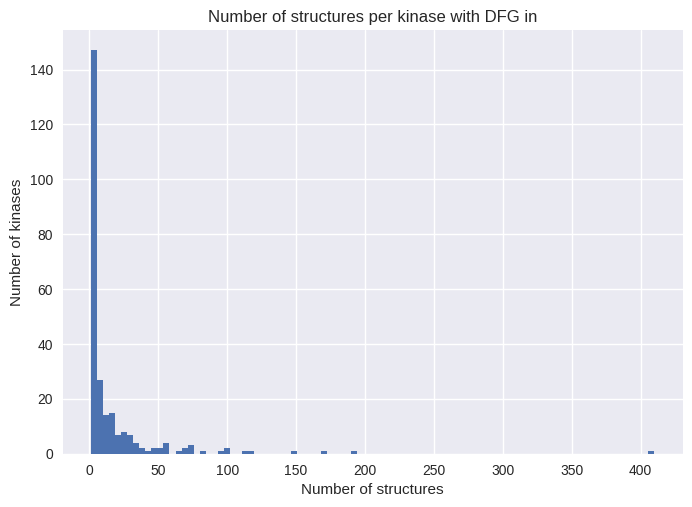

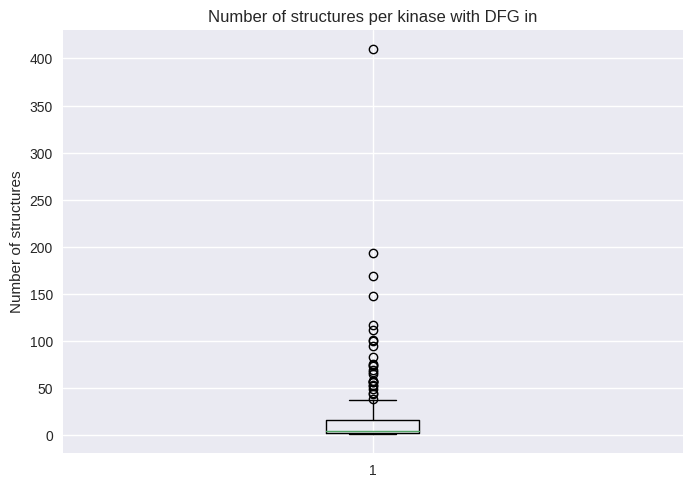

In [222]:
n_structures = list(kinase_to_num_structures.values())
#hist
import matplotlib.pyplot as plt
import numpy as np
plt.hist(n_structures, bins = 'auto')
plt.title('Number of structures per kinase with DFG in')
plt.xlabel('Number of structures')
plt.ylabel('Number of kinases')
plt.show()

#and a boxplot
plt.boxplot(n_structures)
plt.title('Number of structures per kinase with DFG in')
plt.ylabel('Number of structures')
plt.show()


Changed ligand names (unknown names may be discarded - see function docstring):
           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25      

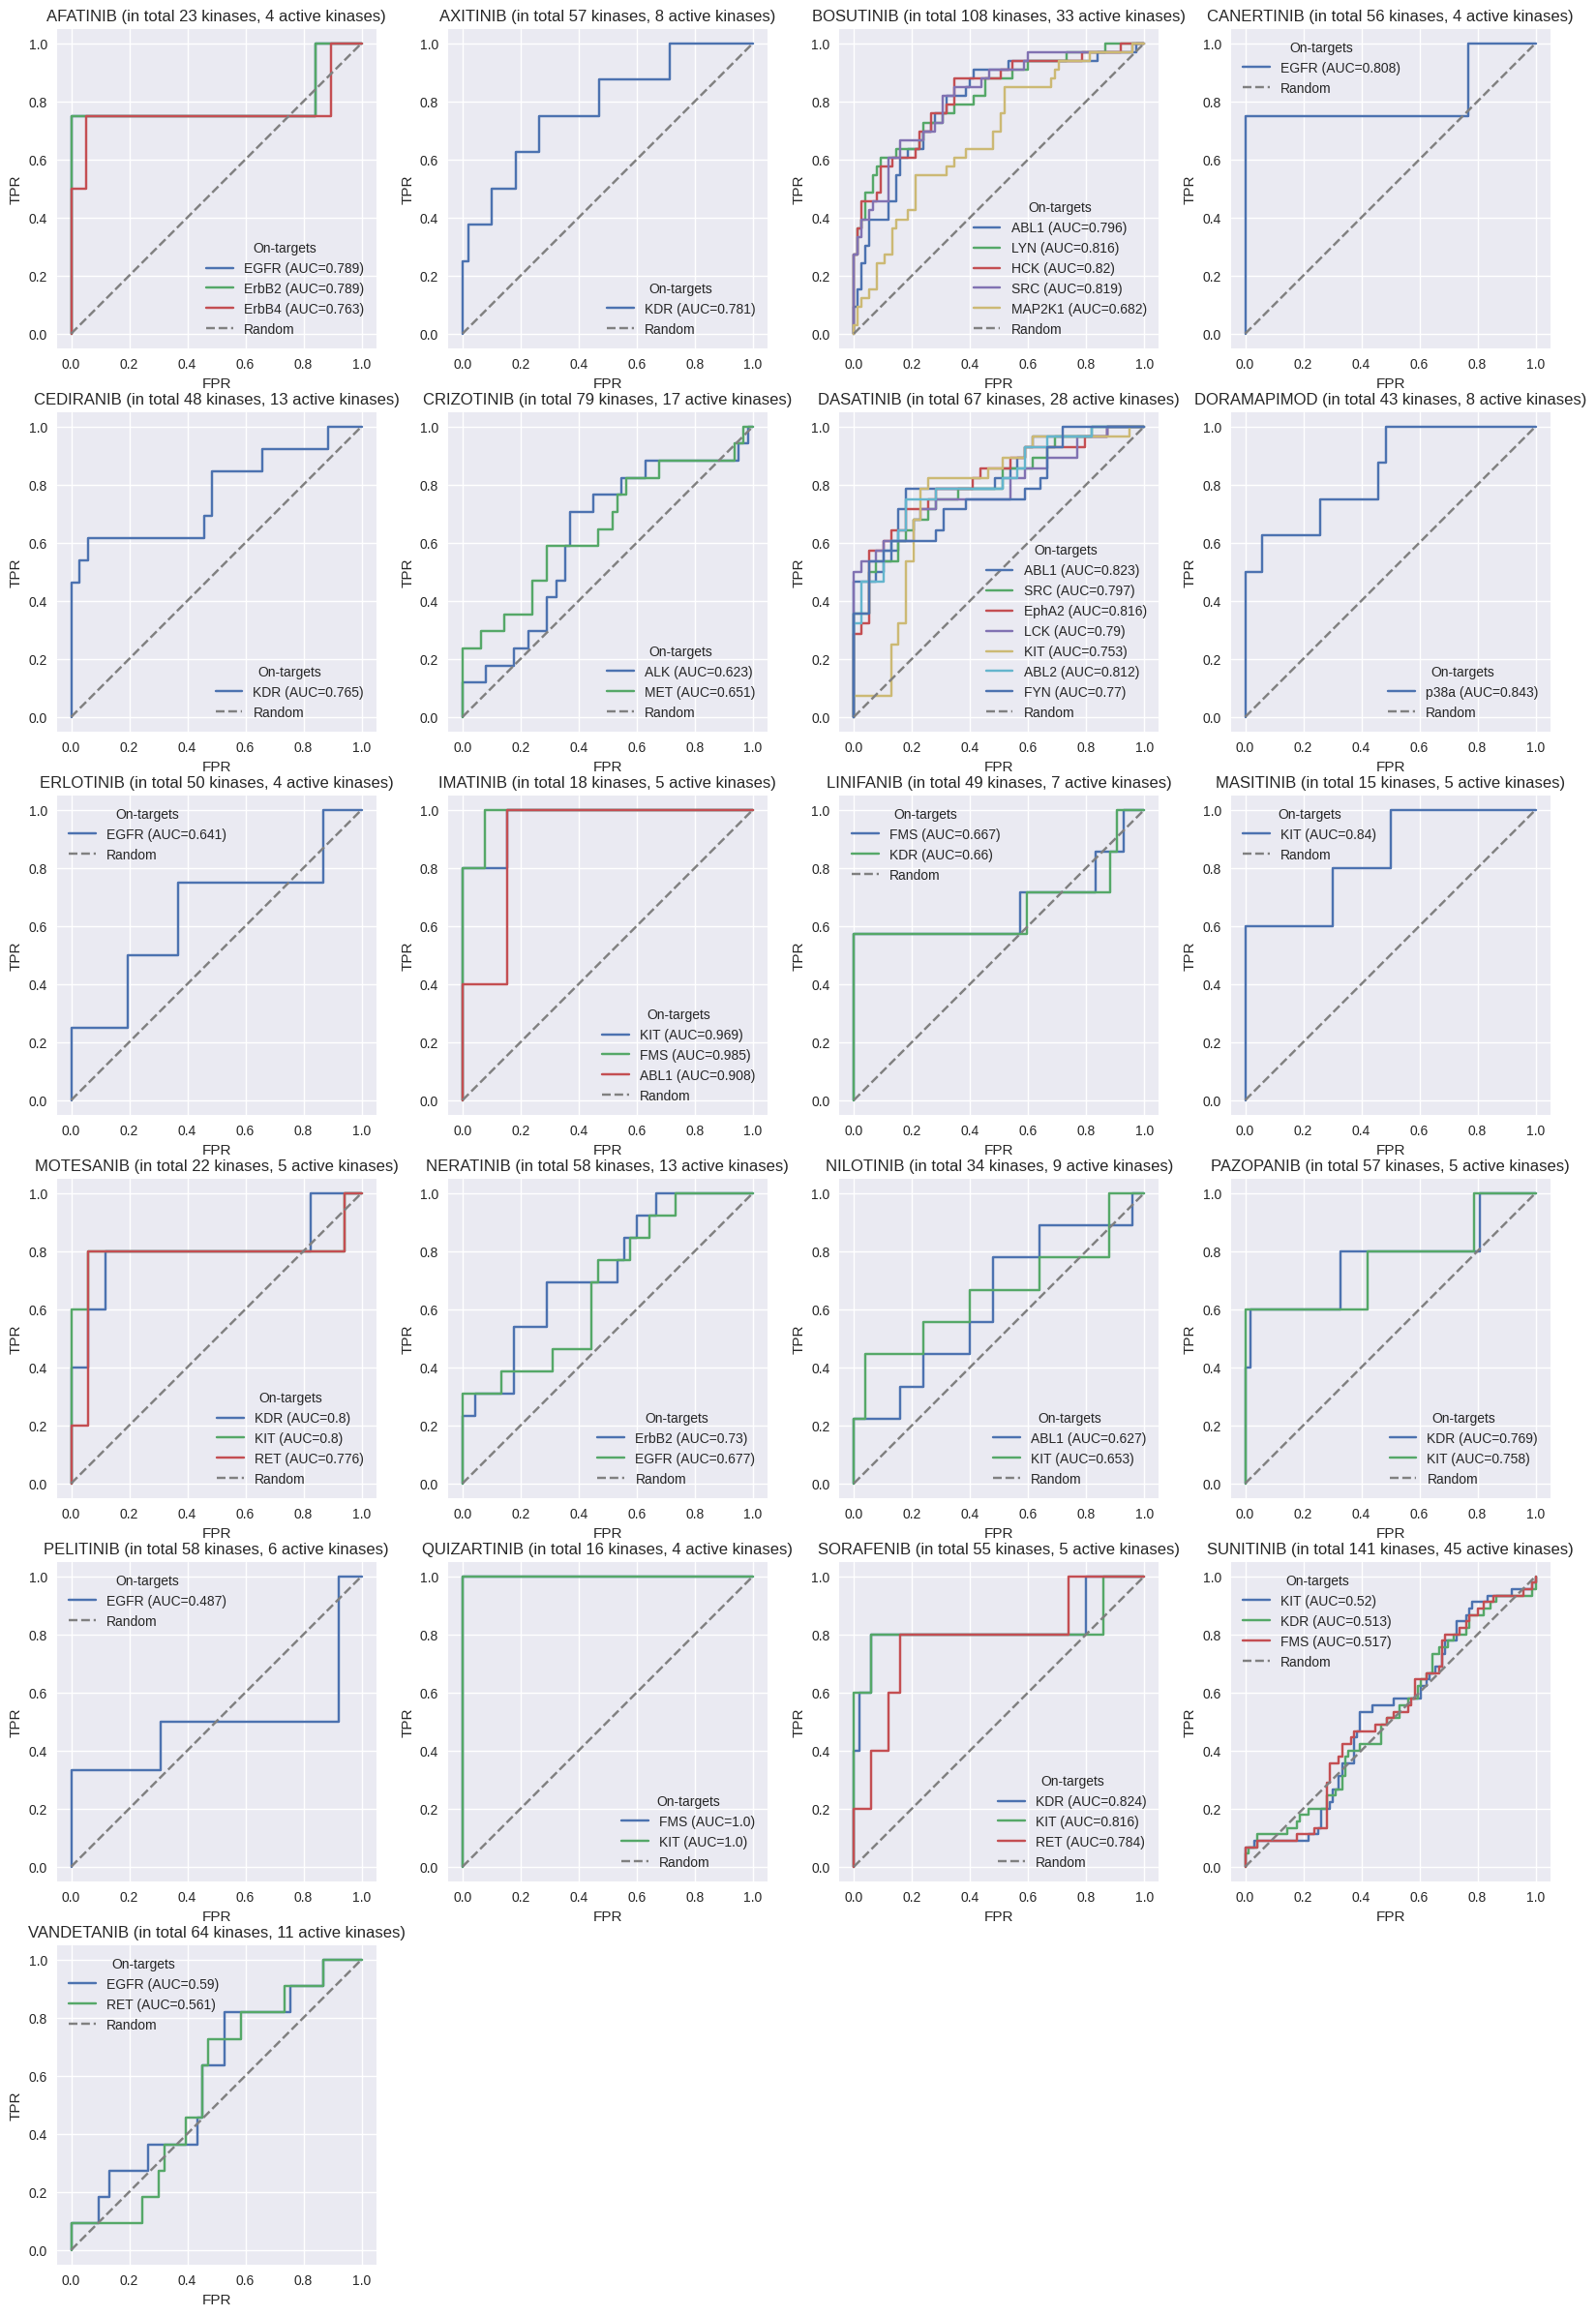

In [9]:
#okay, so, for example CDK2 is highly over represented. lets look where it stands in the profiling
from src.paths import PATH_RESULTS
from kissim.comparison import FingerprintDistanceGenerator
from src.evaluation.ligand_vs_kinase_evaluator import LigandVsKinaseEvaluator
import matplotlib.pyplot as plt
from src import data

KINASE_DISTANCES_METHOD = "kissim"
KINASE_ACTIVITY_CUTOFF = 100
KINASE_ACTIVITY_MAX = True
MIN_N_SHARED_KINASES = 10
MIN_N_SHARED_ACTIVE_KINASES = 3
ligand_profiling_method = 'karaman-davis'


RESULTS = PATH_RESULTS / "dfg_in"

KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"


# We need to save the kinase matrix to file (ugly but here we go)
fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv(KINASE_KINASE_PATH)
distance_matrix = fingerprint_distance_generator.kinase_distance_matrix(
    by="minimum", coverage_min=0.8
)
distance_matrix_path = Path("distance_matrix_tmp.csv")
distance_matrix.to_csv(distance_matrix_path)

# Kinase-ligand profiling dataset
profiling_df = data.profiling.load(
    ligand_profiling_method, pkidb_ligands=True, fda_approved=False
)

ligand_names = profiling_df.columns
ligand_targets = data.targets.pkidb(ligand_names, fda_approved=False)
ligand_kinase_pairs = (
    ligand_targets[["ligand.input", "targets.kinmap"]]
    .explode("targets.kinmap")
    .to_numpy()
    .tolist()
)
evaluator = LigandVsKinaseEvaluator(
    ligand_kinase_pairs,
    ligand_profiling_method,
    KINASE_DISTANCES_METHOD,
    KINASE_ACTIVITY_CUTOFF,
    KINASE_ACTIVITY_MAX,
    MIN_N_SHARED_KINASES,
    MIN_N_SHARED_ACTIVE_KINASES,
    kinase_kinase_path=distance_matrix_path,
)
distance_matrix_path.unlink()  # Remove file again!
aucs = evaluator.plot_roc_curves()
plt.show()


In [71]:
#get ligands where CDK2 is not nan. CDK2 is a row, not a column
liigands_with_cdk2 = []
for col in profiling_df.columns:
    if profiling_df.loc['CDK2', col] > 0:
        liigands_with_cdk2.append(col)
print(f"Number of ligands with CDK2: {len(liigands_with_cdk2)}")
#show those in df
profiling_df.loc['CDK2', liigands_with_cdk2]

Number of ligands with CDK2: 4


Sorafenib       8700.0
Alvocidib        550.0
Enzastaurin     5000.0
Lestaurtinib      20.0
Name: CDK2, dtype: float64

In [31]:
profiling_df_Sorafenib = profiling_df['Sorafenib']
profiling_df_Sorafenib = profiling_df_Sorafenib.dropna()
apo_kinase_names = structures_dfg_in["kinase.klifs_name"].to_list()
profiling_df_Sorafenib = profiling_df_Sorafenib[profiling_df_Sorafenib.index.isin(apo_kinase_names)]
profiling_df_Sorafenib = profiling_df_Sorafenib.sort_values(ascending=True)
print(len(profiling_df_Sorafenib))
profiling_df_Sorafenib

55


ZAK          6.3
RET         13.0
KIT         28.0
FMS         28.0
KDR         59.0
CDKL2      130.0
MNK2       130.0
CDK7       140.0
LOK        150.0
AurC       210.0
p38b       230.0
HH498      280.0
CDK8       310.0
p38a       370.0
CDKL3      490.0
BRAF       540.0
ABL1       680.0
SLK       1000.0
RIPK2     1300.0
LIMK1     1600.0
HIPK2     1700.0
EphB4     1800.0
EphB2     1900.0
EphA3     1900.0
EphA2     2000.0
TRKB      2100.0
TIE2      2100.0
EphA8     2400.0
TAO3      2700.0
FGFR2     2700.0
LCK       2700.0
FGFR1     2800.0
ABL2      2900.0
LYN       3000.0
EphB1     3000.0
TTK       3500.0
EphA5     3500.0
MER       3600.0
FGFR3     4200.0
PLK4      4500.0
AXL       4500.0
HPK1      4800.0
HGK       4800.0
EphA7     5300.0
TRKA      6300.0
p38d      6600.0
TGFbR2    6900.0
JNK2      7400.0
CLK1      7500.0
p38g      7600.0
TNIK      7900.0
CDK5      8300.0
FYN       8400.0
HCK       8500.0
CDK2      8700.0
Name: Sorafenib, dtype: float64

In [34]:
#now get the ranking of these proteins as distance to KDR, KIT and RET, from distance_matrix (rows and colums are kinases, cells are the distances)]
distance_matrix_KDR = distance_matrix.loc['KDR', :]
profiling_kinases_profiling_df_Sorafenib = profiling_df_Sorafenib.index.to_list()
distance_matrix_KDR = distance_matrix_KDR[distance_matrix_KDR.index.isin(profiling_kinases_profiling_df_Sorafenib)]
print(len(distance_matrix_KDR))
distance_matrix_KDR = distance_matrix_KDR.sort_values(ascending=True)
distance_matrix_KDR

#okay, now we want to get the rank difference between ranking according to ligand profiling and ranking according to distance to KDR. lets make a dict
rank_diff_dict = {}
for i, kinase in enumerate(profiling_kinases_profiling_df_Sorafenib):
    rank_diff_dict[kinase] = i - distance_matrix_KDR.index.get_loc(kinase)
rank_diff_dict

55


{'ZAK': -44,
 'RET': -5,
 'KIT': -1,
 'FMS': 2,
 'KDR': 4,
 'CDKL2': -40,
 'MNK2': -37,
 'CDK7': -25,
 'LOK': -16,
 'AurC': -39,
 'p38b': -32,
 'HH498': -36,
 'CDK8': -39,
 'p38a': -17,
 'CDKL3': -27,
 'BRAF': -21,
 'ABL1': 8,
 'SLK': -18,
 'RIPK2': -32,
 'LIMK1': -1,
 'HIPK2': -26,
 'EphB4': 7,
 'EphB2': 12,
 'EphA3': 12,
 'EphA2': 12,
 'TRKB': 4,
 'TIE2': 10,
 'EphA8': 10,
 'TAO3': -25,
 'FGFR2': 24,
 'LCK': 7,
 'FGFR1': 29,
 'ABL2': 14,
 'LYN': 6,
 'EphB1': 19,
 'TTK': -17,
 'EphA5': 23,
 'MER': 30,
 'FGFR3': 34,
 'PLK4': 14,
 'AXL': 21,
 'HPK1': 2,
 'HGK': 5,
 'EphA7': 34,
 'TRKA': 15,
 'p38d': 5,
 'TGFbR2': -8,
 'JNK2': -2,
 'CLK1': 14,
 'p38g': 11,
 'TNIK': 17,
 'CDK5': 20,
 'FYN': 24,
 'HCK': 31,
 'CDK2': 28}

In [53]:
#lets combine this into new df with value_counts_df
ranking_df = pd.DataFrame(profiling_df_Sorafenib)
ranking_df['distance_to_KDR'] = distance_matrix_KDR
ranking_df['rank_diff_to_KDR'] = ranking_df.index.to_series().map(rank_diff_dict)
ranking_df['value_counts'] = value_counts_df
#now sort by value counts
ranking_df = ranking_df.sort_values(by='value_counts', ascending=False)
ranking_df

,Sorafenib,distance_to_KDR,rank_diff_to_KDR,value_counts
CDK2,8700.0,0.084154,28,410
p38a,370.0,0.086486,-17,111
TTK,3500.0,0.110206,-17,69
FGFR1,2800.0,0.043268,29,53
EphA2,2000.0,0.070497,12,37
CLK1,7500.0,0.090117,14,34
FGFR2,2700.0,0.051032,24,29
LCK,2700.0,0.081569,7,29
BRAF,540.0,0.091337,-21,28
EphA3,1900.0,0.069784,12,24


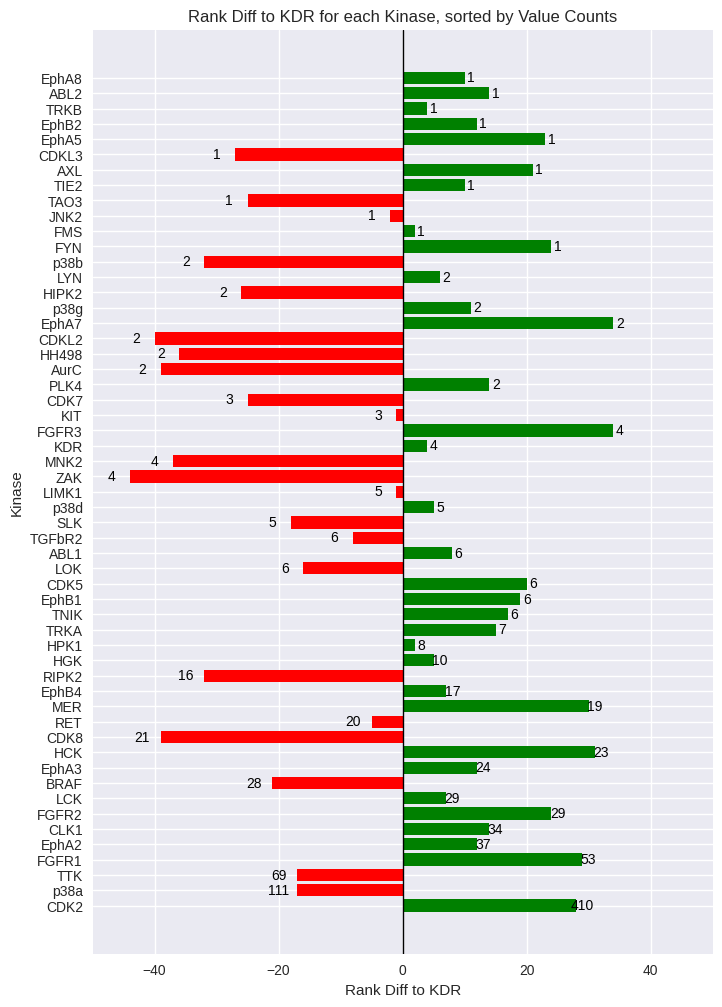

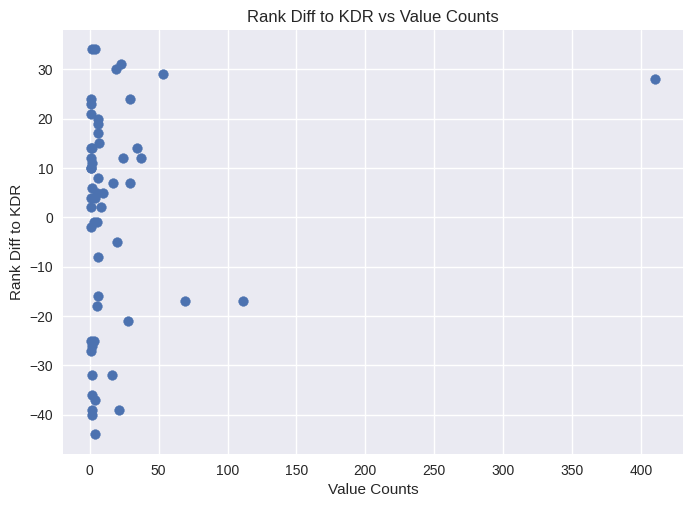

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (based on the structure you've provided)
df = ranking_df
# Sort the DataFrame by value_counts
df_sorted = df.sort_values('value_counts', ascending=False)

# Set colors based on positive or negative rank_diff_to_KDR
colors = ['green' if val > 0 else 'red' for val in df_sorted['rank_diff_to_KDR']]

# Create the bar plot
plt.figure(figsize=(8, 12))
bars = plt.barh(df_sorted.index, df_sorted['rank_diff_to_KDR'], color=colors)

# Add gridlines, center x-axis at zero
plt.axvline(x=0, color='black', linewidth=1)

# Add the value_counts in black text inside the bars
for bar, value_count in zip(bars, df_sorted['value_counts']):
    plt.text(
        bar.get_width() + (1 if bar.get_width() > 0 else -3),  # Position text to the right or left based on bar direction
        bar.get_y() + bar.get_height() / 2,  # Center text vertically
        f'{value_count}',  # Text content (the value count)
        va='center', ha='center', color='black', fontsize=10  # Text appearance
    )

# Set labels
plt.xlabel('Rank Diff to KDR')
plt.ylabel('Kinase')
plt.title('Rank Diff to KDR for each Kinase, sorted by Value Counts')
plt.xlim(-50, 50)  # Set x-axis limits
# Show plot
plt.show()

#also plot absolute value for rank diff (x axis) against value counts (y axis)
plt.scatter(ranking_df['value_counts'].abs(), ranking_df['rank_diff_to_KDR'])
plt.ylabel('Rank Diff to KDR')
plt.xlabel('Value Counts')
plt.title('Rank Diff to KDR vs Value Counts')
plt.show()

In [52]:
df_sorted

,distance_to_KDR,rank_diff_to_KDR,value_counts
Sorafenib,,,
8700.0,0.084154,28,410
370.0,0.086486,-17,111
3500.0,0.110206,-17,69
2800.0,0.043268,29,53
2000.0,0.070497,12,37
7500.0,0.090117,14,34
2700.0,0.051032,24,29
2700.0,0.081569,7,29
540.0,0.091337,-21,28


In [43]:
ranking_df[ranking_df.index == 'CDK2']['distance_to_KDR'].values[0]

0.0841544494121113

In [25]:
profiling_df_Sorafenib

ZAK          6.3
RET         13.0
KIT         28.0
FMS         28.0
KDR         59.0
CDKL2      130.0
MNK2       130.0
CDK7       140.0
LOK        150.0
AurC       210.0
p38b       230.0
HH498      280.0
CDK8       310.0
p38a       370.0
CDKL3      490.0
BRAF       540.0
ABL1       680.0
SLK       1000.0
RIPK2     1300.0
LIMK1     1600.0
HIPK2     1700.0
EphB4     1800.0
EphB2     1900.0
EphA3     1900.0
EphA2     2000.0
TRKB      2100.0
TIE2      2100.0
EphA8     2400.0
TAO3      2700.0
FGFR2     2700.0
LCK       2700.0
FGFR1     2800.0
ABL2      2900.0
LYN       3000.0
EphB1     3000.0
TTK       3500.0
EphA5     3500.0
MER       3600.0
FGFR3     4200.0
PLK4      4500.0
AXL       4500.0
HPK1      4800.0
HGK       4800.0
EphA7     5300.0
TRKA      6300.0
p38d      6600.0
TGFbR2    6900.0
JNK2      7400.0
CLK1      7500.0
p38g      7600.0
TNIK      7900.0
CDK5      8300.0
FYN       8400.0
HCK       8500.0
CDK2      8700.0
Name: Sorafenib, dtype: float64

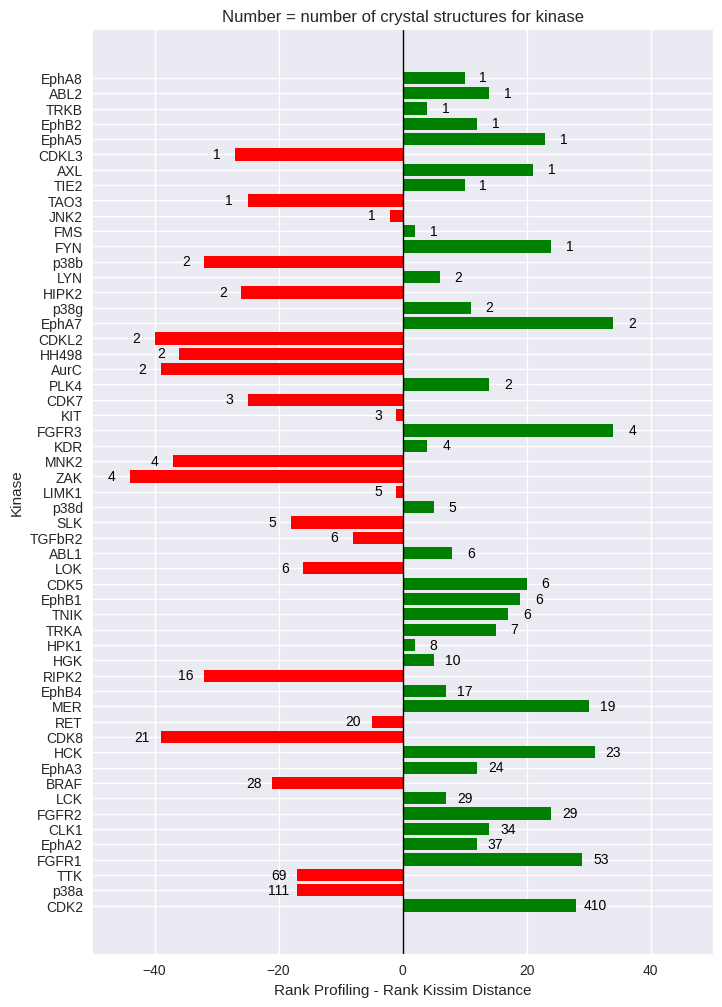

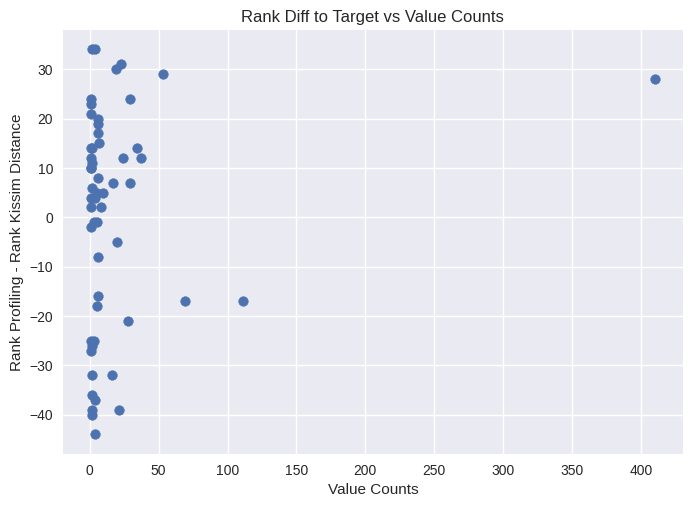

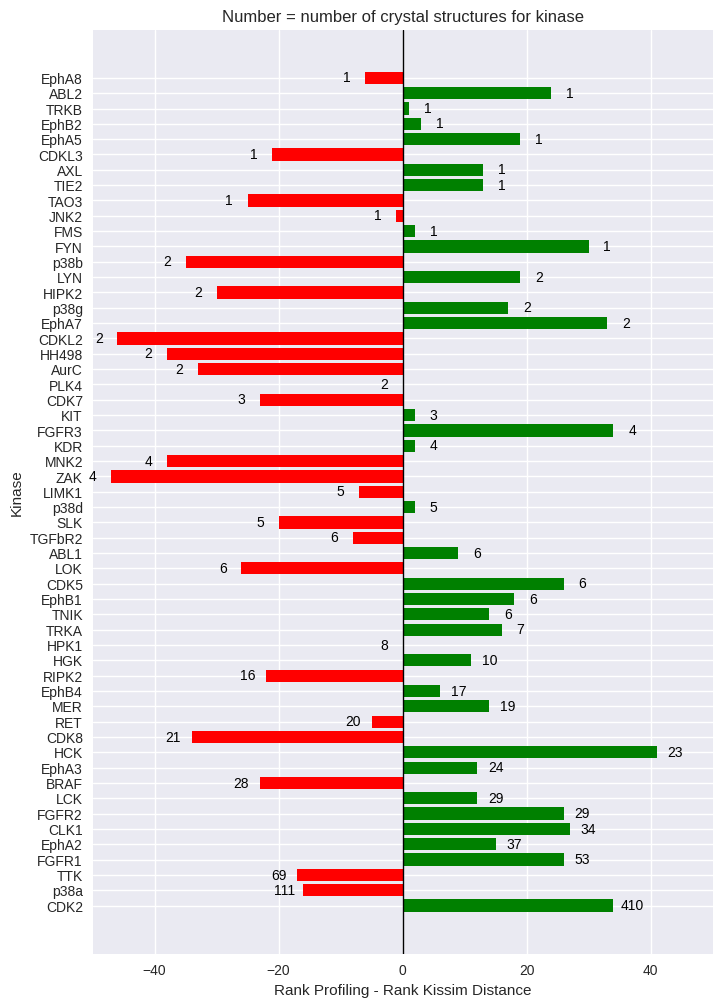

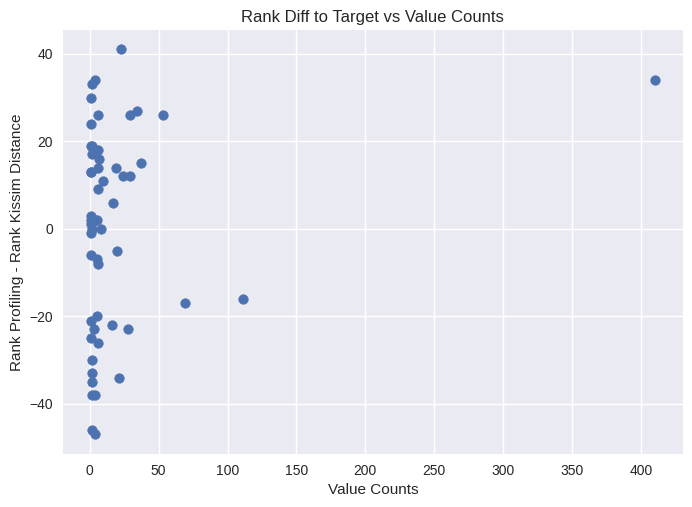

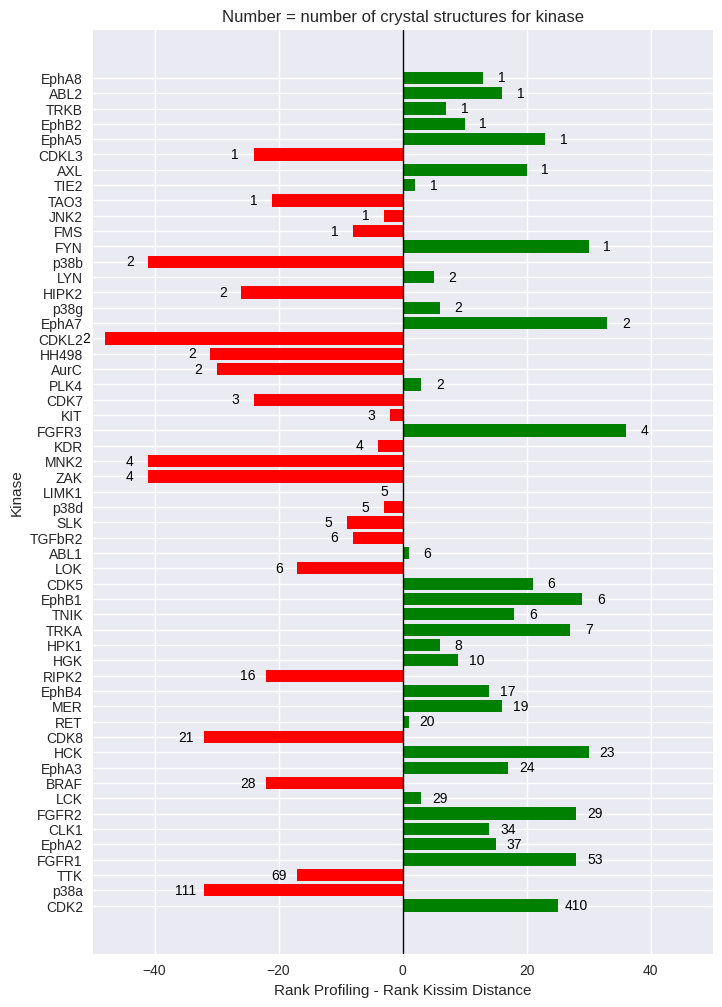

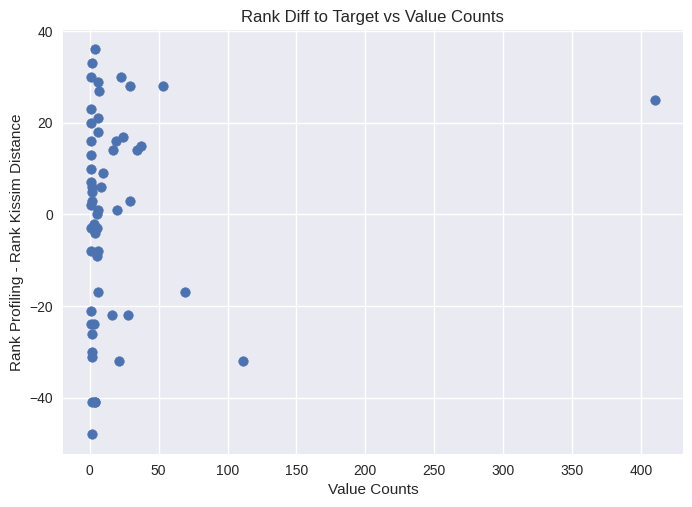

In [230]:
def get_plot_for_drug_and_target(drug,target):
    profiling_df_Sorafenib = profiling_df[drug]
    profiling_df_Sorafenib = profiling_df_Sorafenib.dropna()
    apo_kinase_names = structures_dfg_in["kinase.klifs_name"].to_list()
    profiling_df_Sorafenib = profiling_df_Sorafenib[profiling_df_Sorafenib.index.isin(apo_kinase_names)]
    profiling_df_Sorafenib = profiling_df_Sorafenib.sort_values(ascending=True)
    distance_matrix_KDR = distance_matrix.loc[target, :]
    profiling_kinases_profiling_df_Sorafenib = profiling_df_Sorafenib.index.to_list()
    distance_matrix_KDR = distance_matrix_KDR[distance_matrix_KDR.index.isin(profiling_kinases_profiling_df_Sorafenib)]
    distance_matrix_KDR = distance_matrix_KDR.sort_values(ascending=True)
    rank_diff_dict = {}
    for i, kinase in enumerate(profiling_kinases_profiling_df_Sorafenib):
        rank_diff_dict[kinase] = i - distance_matrix_KDR.index.get_loc(kinase)
    ranking_df = pd.DataFrame(profiling_df_Sorafenib)
    ranking_df['distance_to_target'] = distance_matrix_KDR
    ranking_df['rank_profiling_minus_rank_kissim_distance'] = ranking_df.index.to_series().map(rank_diff_dict)
    ranking_df['value_counts'] = value_counts_df
    ranking_df = ranking_df.sort_values(by='value_counts', ascending=False)
    df = ranking_df
    df_sorted = df.sort_values('value_counts', ascending=False)
    colors = ['green' if val > 0 else 'red' for val in df_sorted['rank_profiling_minus_rank_kissim_distance']]
    plt.figure(figsize=(8, 12))
    bars = plt.barh(df_sorted.index, df_sorted['rank_profiling_minus_rank_kissim_distance'], color=colors)
    plt.axvline(x=0, color='black', linewidth=1)
    for bar, value_count in zip(bars, df_sorted['value_counts']):
        plt.text(
            bar.get_width() + (3 if bar.get_width() > 0 else -3),  # Position text to the right or left based on bar direction
            bar.get_y() + bar.get_height() / 2,  # Center text vertically
            f'{value_count}',  # Text content (the value count)
            va='center', ha='center', color='black', fontsize=10  # Text appearance
        )

    plt.xlabel('Rank Profiling - Rank Kissim Distance')
    plt.ylabel('Kinase')
    plt.title('Number = number of crystal structures for kinase')
    plt.xlim(-50, 50)  # Set x-axis limits
    plt.show()

    plt.scatter(ranking_df['value_counts'].abs(), ranking_df['rank_profiling_minus_rank_kissim_distance'])
    plt.ylabel('Rank Profiling - Rank Kissim Distance')
    plt.xlabel('Value Counts')
    plt.title('Rank Diff to Target vs Value Counts')
    plt.show()

get_plot_for_drug_and_target('Sorafenib','KDR')
get_plot_for_drug_and_target('Sorafenib','KIT')
get_plot_for_drug_and_target('Sorafenib','RET')

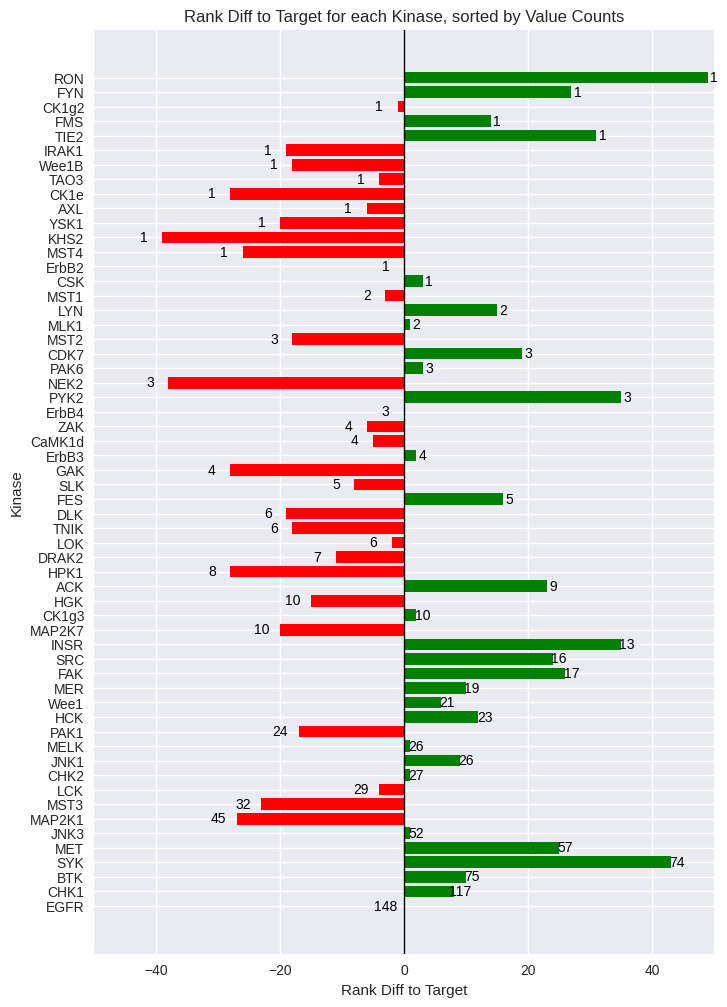

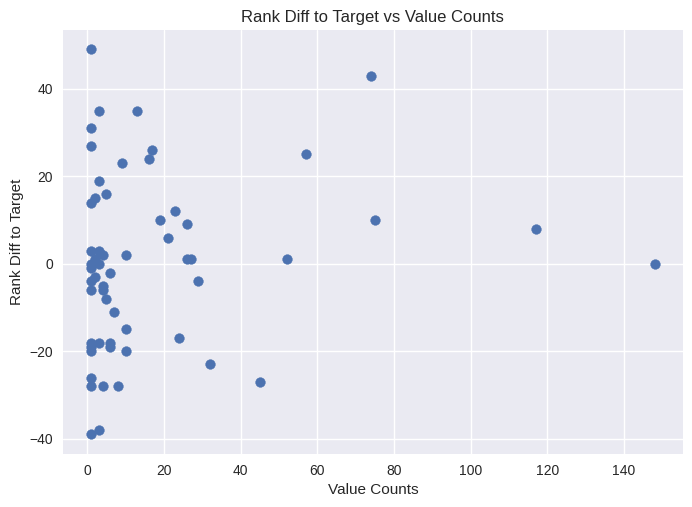

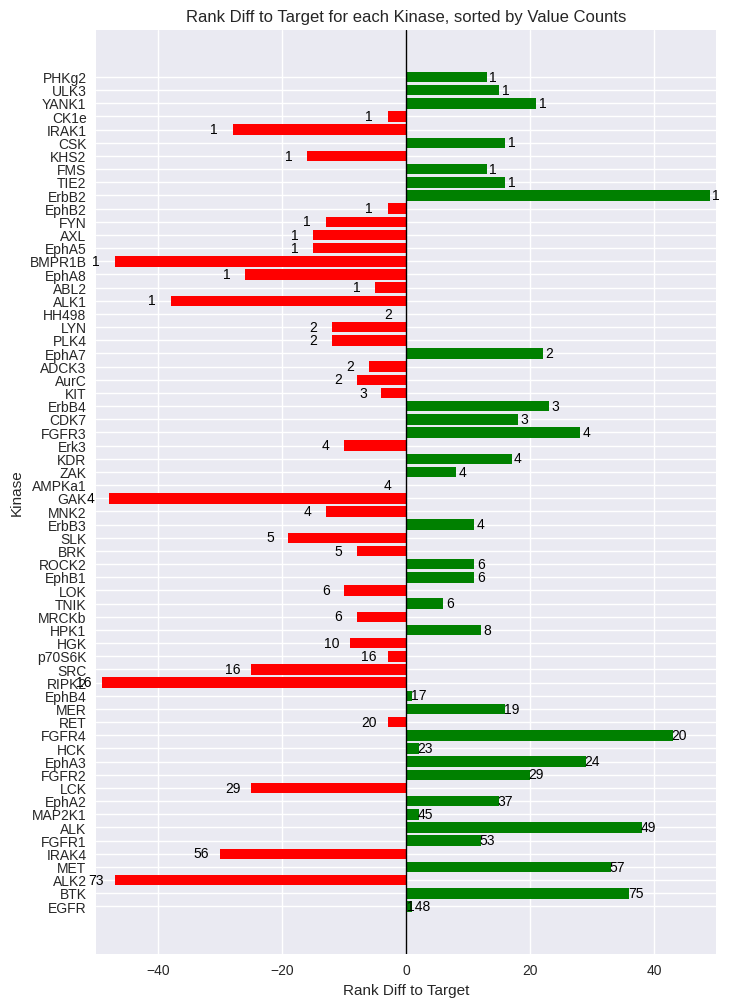

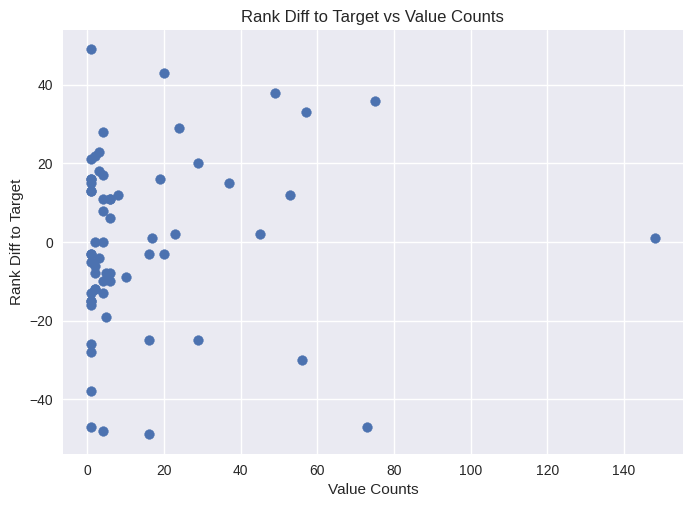

In [64]:
#check some cases
get_plot_for_drug_and_target('Neratinib','EGFR')
get_plot_for_drug_and_target('Vandetanib','EGFR')

In [74]:

profiling_df_Sorafenib = profiling_df[drug]
profiling_df_Sorafenib = profiling_df_Sorafenib.dropna()
apo_kinase_names = structures_dfg_in["kinase.klifs_name"].to_list()
profiling_df_Sorafenib = profiling_df_Sorafenib[profiling_df_Sorafenib.index.isin(apo_kinase_names)]
profiling_df_Sorafenib = profiling_df_Sorafenib.sort_values(ascending=True)
distance_matrix_KDR = distance_matrix.loc[target, :]
profiling_kinases_profiling_df_Sorafenib = profiling_df_Sorafenib.index.to_list()
distance_matrix_KDR = distance_matrix_KDR[distance_matrix_KDR.index.isin(profiling_kinases_profiling_df_Sorafenib)]
distance_matrix_KDR = distance_matrix_KDR.sort_values(ascending=True)
rank_diff_dict = {}
for i, kinase in enumerate(profiling_kinases_profiling_df_Sorafenib):
    rank_diff_dict[kinase] = i - distance_matrix_KDR.index.get_loc(kinase)
ranking_df = pd.DataFrame(profiling_df_Sorafenib)
ranking_df['distance_to_target'] = distance_matrix_KDR
ranking_df['rank_diff_to_target'] = ranking_df.index.to_series().map(rank_diff_dict)
ranking_df['value_counts'] = value_counts_df
ranking_df = ranking_df.sort_values(by='value_counts', ascending=False)
ranking_df

Number of ligands with ZAK: 17


,Midostaurin,distance_to_target,rank_diff_to_target,value_counts
CK2a1,250.0,0.113367,-51,193
PIM1,560.0,0.103933,-2,169
EGFR,1300.0,0.097828,43,148
CHK1,1300.0,0.097518,41,117
AurA,120.0,0.096418,-8,101
SYK,88.0,0.094532,-6,74
TTK,350.0,0.118736,-56,69
DYRK1A,100.0,0.102193,-34,67
GSK3B,1800.0,0.104881,24,65
MET,690.0,0.095617,37,57


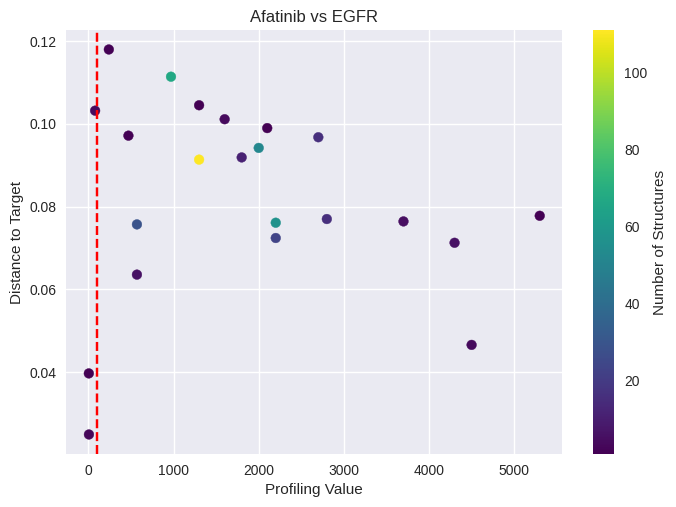

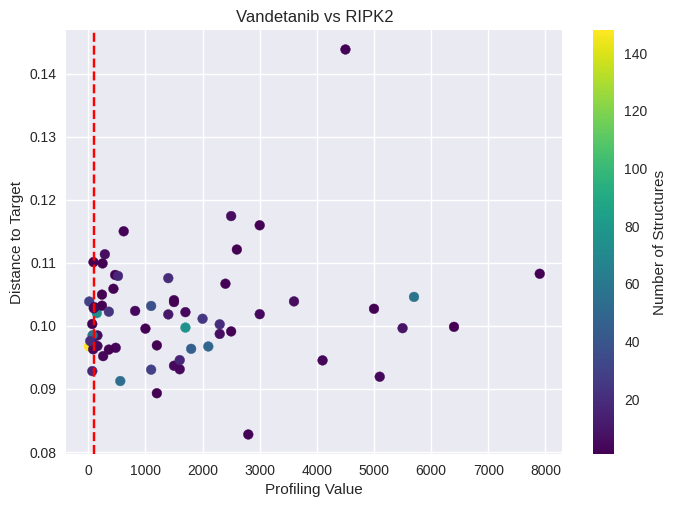

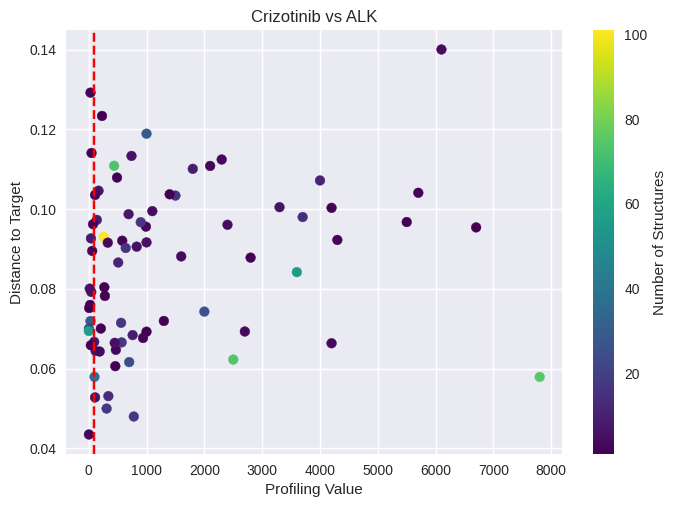

In [128]:
def plot_for_drug(drug,target=None):
    if target is None:
        target = profiling_df[drug].idxmin()    
    profiling_df_drug = profiling_df[drug]
    profiling_df_drug = profiling_df_drug.dropna()
    distance_matrix_target = distance_matrix[target]
    distance_matrix_target = distance_matrix_target[distance_matrix_target.index.isin(profiling_df_drug.index)]
    profiling_df_drug = profiling_df_drug[profiling_df_drug.index.isin(distance_matrix_target.index)]  
    df = pd.DataFrame(profiling_df_drug)
    df['distance_to_target'] = distance_matrix_target
    df['num_structures'] = df.index.to_series().map(kinase_to_num_structures)
    df = df[df.index != target]
    plt.scatter(df[drug], df['distance_to_target'], c=df['num_structures'], cmap='viridis')
    cbar = plt.colorbar()
    cbar.set_label('Number of Structures')
    plt.ylabel('Distance to Target')
    plt.xlabel('Profiling Value')
    plt.title(f'{drug} vs {target}')
    plt.axvline(x=KINASE_ACTIVITY_CUTOFF, color='r', linestyle='--')
    plt.show()
plot_for_drug('Afatinib')
plot_for_drug('Vandetanib')
plot_for_drug('Crizotinib',target='ALK')


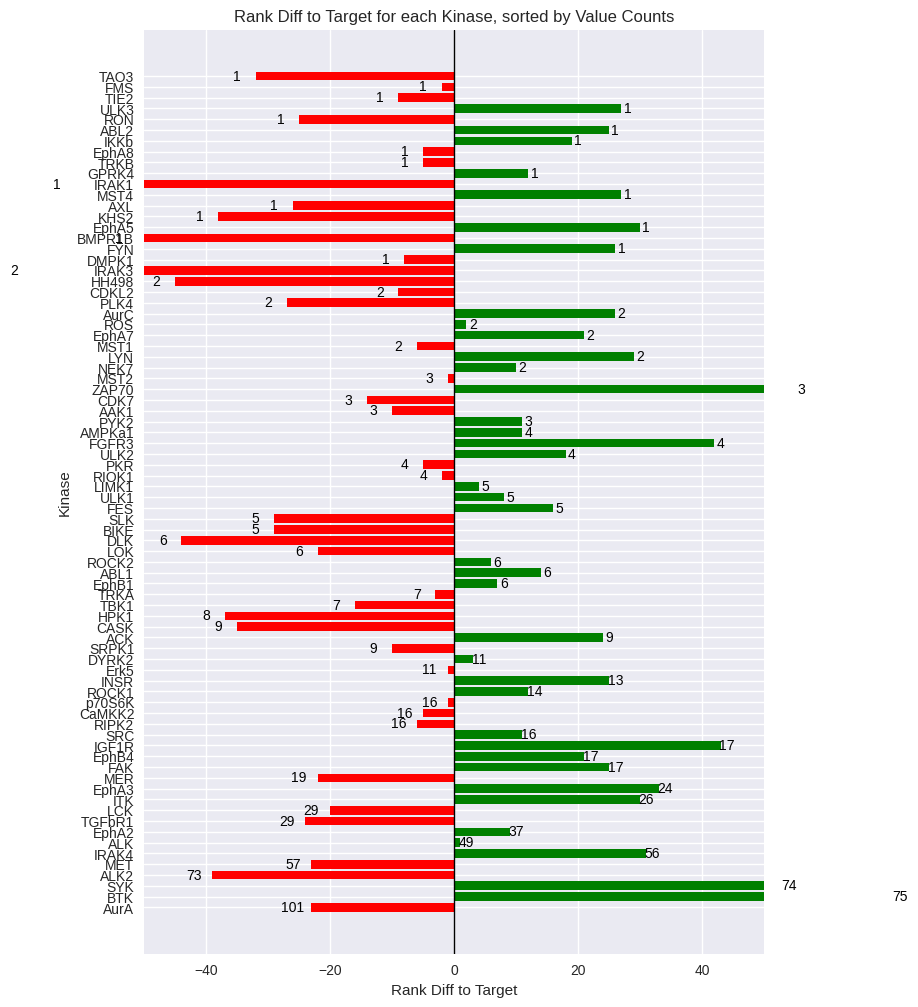

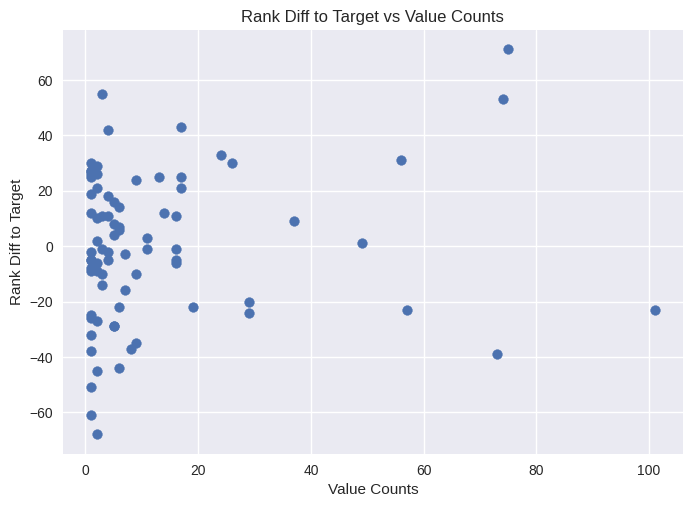

In [129]:
get_plot_for_drug_and_target('Crizotinib','ALK')

In [ ]:
#okay, maybe this is also because the distance is both from amino acid sequence and the geomtry

In [130]:
import pandas as pd
from tqdm import tqdm
#okay wait, what we actually want to know is this; for kinase pairs that have a structure with the same ligand, how often is the minimum distance between these two kinases the one between the structures witht the same ligand?
matrix_df = pd.read_csv("kinase_ligand_matrix.csv",index_col=0)
#get all the pairs where the kinases are not the same, and where the cell does not contain an empty dict
kinases = matrix_df.columns[1:]
dict_pairs_same_ligand = {}
for kinase1 in kinases:
    for kinase2 in kinases:
        if kinase1 != kinase2:
            cell_value = matrix_df[kinase1][kinase2]
            if cell_value != {}:
                dict_pairs_same_ligand[(kinase1,kinase2)] = cell_value
dict_pairs_same_ligand = {k: v for k, v in dict_pairs_same_ligand.items() if v != 'set()'}
dict_pairs_same_ligand
# Step 1: Create a dictionary for structure -> ligand mapping
structure_to_ligand = structures.set_index("structure.klifs_id")["ligand.expo_id"].to_dict()
#iterate over the dict, and for each pair, get the structure.1 and structure.2 for the minimum distance
KINASE_KINASE_PATH = RESULTS / "fingerprint_distances.csv.bz2"
kinase_kinase_csv = pd.read_csv(KINASE_KINASE_PATH)
# Step 2: Filter kinase_kinase_csv based on the pairs in dict_pairs_same_ligand and sort by distance
kinase_pairs_df = pd.DataFrame(list(dict_pairs_same_ligand.keys()), columns=['kinase.1', 'kinase.2'])
kinase_kinase_filtered = kinase_kinase_csv.merge(kinase_pairs_df, on=['kinase.1', 'kinase.2'])

# Step 3: Find the minimum distance per pair and get corresponding structures
kinase_kinase_filtered = kinase_kinase_filtered.sort_values("distance").drop_duplicates(subset=['kinase.1', 'kinase.2'], keep='first')

# Step 4: Map structure IDs to ligands for structure.1 and structure.2
kinase_kinase_filtered['ligand1'] = kinase_kinase_filtered['structure.1'].map(structure_to_ligand)
kinase_kinase_filtered['ligand2'] = kinase_kinase_filtered['structure.2'].map(structure_to_ligand)

# Step 5: Calculate how many pairs have the same ligand
n_the_same = (kinase_kinase_filtered['ligand1'] == kinase_kinase_filtered['ligand2']).sum()

# Step 6: Calculate percentage
percentage = (n_the_same / len(dict_pairs_same_ligand)) * 100
print(f'% of kinase pairs that have a structure with the same ligand, where the minimum distance is between the structures with the same ligand: {percentage:.2f}%')


% of kinase pairs that have a structure with the same ligand, where the minimum distance is between the structures with the same ligand: 6.36%


In [132]:
kinase_kinase_csv_tmp = kinase_kinase_csv[kinase_kinase_csv['kinase.1'] == 'JNK3']
kinase_kinase_csv_tmp = kinase_kinase_csv_tmp[kinase_kinase_csv_tmp['kinase.2'] == 'JNK1']
kinase_kinase_csv_tmp = kinase_kinase_csv_tmp.sort_values(by='distance')
kinase_kinase_csv_tmp

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
4280982,3448,4629,JNK3,JNK1,0.010283,0.987333
4289649,3451,4651,JNK3,JNK1,0.013635,0.987333
4280991,3448,4651,JNK3,JNK1,0.013769,0.987333
4280996,3448,4658,JNK3,JNK1,0.013939,0.978000
4280988,3448,4642,JNK3,JNK1,0.014164,0.979333
...,...,...,...,...,...,...
4286775,3450,4672,JNK3,JNK1,0.096878,0.977333
4286767,3450,4654,JNK3,JNK1,0.096957,0.977333
4286758,3450,4632,JNK3,JNK1,0.097221,0.977333
4288839,3450,12984,JNK3,JNK1,0.097721,0.982667


In [134]:
kinase_kinase_csv['ligand1'] = kinase_kinase_csv['structure.1'].map(structure_to_ligand)
kinase_kinase_csv['ligand2'] = kinase_kinase_csv['structure.2'].map(structure_to_ligand)
kinase_kinase_csv

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage,ligand1,ligand2
0,4,8,EphA7,ITK,0.064311,0.954000,-,B49
1,4,9,EphA7,ITK,0.094182,0.985333,-,M0Y
2,4,11,EphA7,ITK,0.075470,0.977333,-,PQC
3,4,12,EphA7,ITK,0.066460,0.962000,-,29Y
4,4,16,EphA7,ITK,0.075279,0.985333,-,IAQ
...,...,...,...,...,...,...,...,...
8452211,13857,13863,Wee1,ATM,0.150554,0.972000,05J,UF8
8452212,13857,13864,Wee1,ATM,0.148120,0.972000,05J,UGK
8452213,13862,13863,ATM,ATM,0.011811,0.976667,AGS,UF8
8452214,13862,13864,ATM,ATM,0.012624,0.976667,AGS,UGK


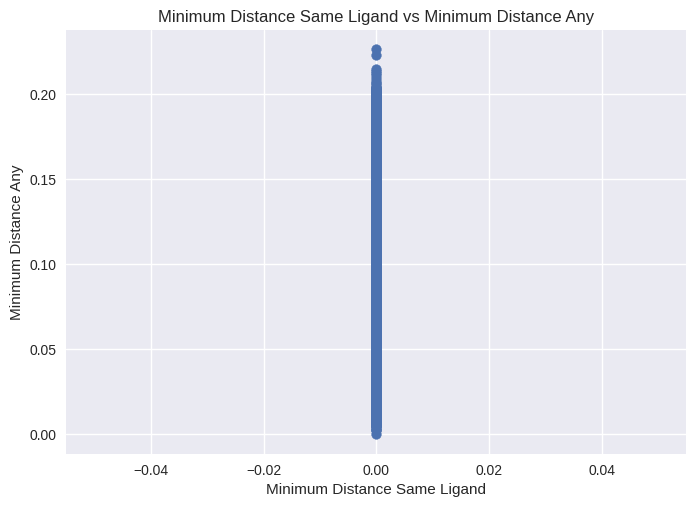

In [135]:
#now, for each pair, get the smallest distance between structures with the same ligand1 and ligand2 (if multiple structures with the same ligand, take the smallest distance). also get the smallest distance between any. we plot those against eachother
kinase_kinase_csv['same_ligand'] = kinase_kinase_csv['ligand1'] == kinase_kinase_csv['ligand2']
kinase_kinase_csv['min_distance_same_ligand'] = kinase_kinase_csv.groupby('same_ligand')['distance'].transform('min')
kinase_kinase_csv['min_distance_any'] = kinase_kinase_csv['distance']
kinase_kinase_csv = kinase_kinase_csv.drop_duplicates(subset=['kinase.1', 'kinase.2', 'same_ligand'], keep='first')
plt.scatter(kinase_kinase_csv['min_distance_same_ligand'], kinase_kinase_csv['min_distance_any'])
plt.ylabel('Minimum Distance Any')
plt.xlabel('Minimum Distance Same Ligand')
plt.title('Minimum Distance Same Ligand vs Minimum Distance Any')
plt.show()

/localhome/cschiebroek/.conda/envs/kissim-app/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
  0%|          | 0/52146 [00:00<?, ?it/s]

100%|██████████| 52146/52146 [02:13<00:00, 390.79it/s]


Text(0.5, 1.0, 'Minimum Distance Same Ligand vs Minimum Distance Any')

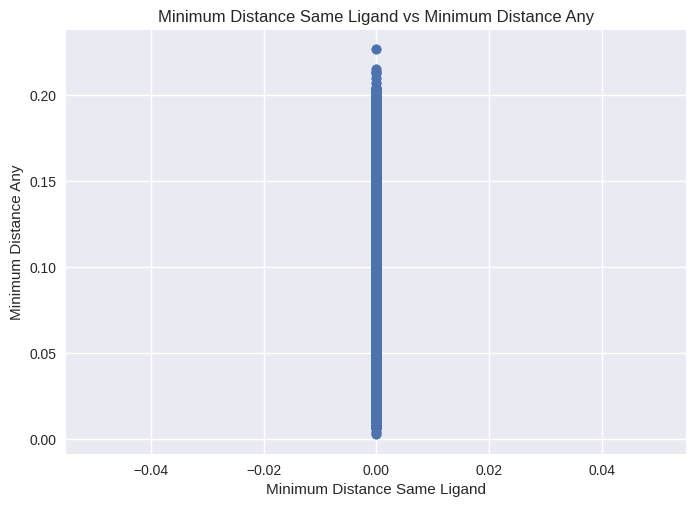

In [137]:
kinase_kinase_csv['kinase1kinase2'] = kinase_kinase_csv['kinase.1'] + kinase_kinase_csv['kinase.2']
min_dist_total,min_dist_same_ligand = [],[]
kinase1kinase2s = kinase_kinase_csv['kinase1kinase2'].unique()
for kinase1kinase2 in tqdm(kinase1kinase2s):
    kinase_kinase_csv_tmp = kinase_kinase_csv[kinase_kinase_csv['kinase1kinase2'] == kinase1kinase2]
    min_dist_total.append(kinase_kinase_csv_tmp['min_distance_any'].values[0])
    min_dist_same_ligand.append(kinase_kinase_csv_tmp['min_distance_same_ligand'].values[0])
plt.scatter(min_dist_same_ligand, min_dist_total)
plt.ylabel('Minimum Distance Any')
plt.xlabel('Minimum Distance Same Ligand')
plt.title('Minimum Distance Same Ligand vs Minimum Distance Any')


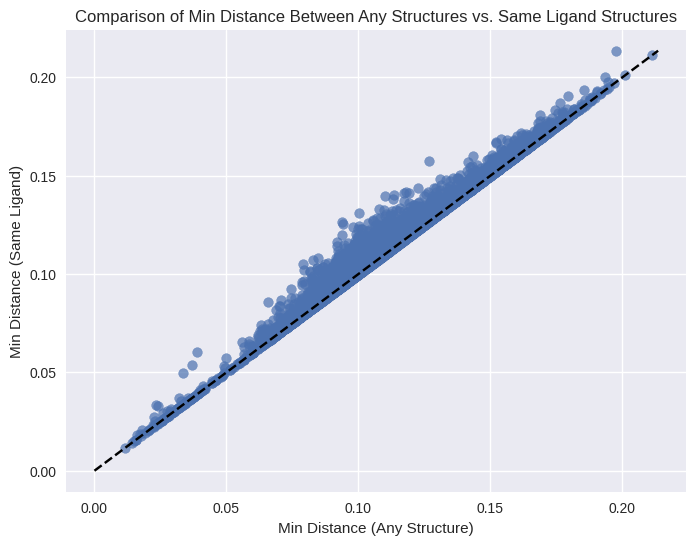

% of kinase pairs that have a structure with the same ligand, where the minimum distance is between the structures with the same ligand: 32.28%
% of kinase pairs that have a structure with the same ligand, where the minimum distance is within 0.01 between the structures with the same ligand: 58.86%


In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a dictionary for structure -> ligand mapping
structure_to_ligand = structures.set_index("structure.klifs_id")["ligand.expo_id"].to_dict()

# Step 2: For each kinase pair, find the minimum distance for all structures
kinase_pairs_df = pd.DataFrame(list(dict_pairs_same_ligand.keys()), columns=['kinase.1', 'kinase.2'])
kinase_kinase_filtered = kinase_kinase_csv.merge(kinase_pairs_df, on=['kinase.1', 'kinase.2'])

structures_dfg_in_ac_in = structures[structures["structure.dfg"] == "in"]
structures_dfg_in_ac_in = structures_dfg_in_ac_in[structures_dfg_in_ac_in["structure.ac_helix"] == "in"]
structures_dfg_in_ac_in_no_allosteric = structures_dfg_in_ac_in[structures_dfg_in_ac_in["ligand_allosteric.expo_id"] == "-"]
structures_dfg_in_ac_in_no_allosteric_klifs_ids = structures_dfg_in_ac_in_no_allosteric["structure.klifs_id"].to_list()

kinase_kinase_filtered = kinase_kinase_filtered[kinase_kinase_filtered['structure.1'].isin(structures_dfg_in_ac_in_no_allosteric_klifs_ids)]
kinase_kinase_filtered = kinase_kinase_filtered[kinase_kinase_filtered['structure.2'].isin(structures_dfg_in_ac_in_no_allosteric_klifs_ids)]

# Find the minimum distance between any two structures
min_distance_any_structure = (
    kinase_kinase_filtered.groupby(['kinase.1', 'kinase.2'])['distance']
    .min()
    .reset_index()
    .rename(columns={'distance': 'min_distance_any'})
)

# Step 3: Find the minimum distance between structures with the same ligand
kinase_kinase_filtered['ligand1'] = kinase_kinase_filtered['structure.1'].map(structure_to_ligand)
kinase_kinase_filtered['ligand2'] = kinase_kinase_filtered['structure.2'].map(structure_to_ligand)

# Filter rows where ligands are the same
same_ligand_df = kinase_kinase_filtered[kinase_kinase_filtered['ligand1'] == kinase_kinase_filtered['ligand2']]

# Find the minimum distance between structures that have the same ligand
min_distance_same_ligand = (
    same_ligand_df.groupby(['kinase.1', 'kinase.2'])['distance']
    .min()
    .reset_index()
    .rename(columns={'distance': 'min_distance_same_ligand'})
)

# Step 4: Merge the two datasets to compare minimum distances
comparison_df = pd.merge(min_distance_any_structure, min_distance_same_ligand, on=['kinase.1', 'kinase.2'], how='left')

# Step 5: Plot the comparison
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df['min_distance_any'], comparison_df['min_distance_same_ligand'], alpha=0.7)
plt.xlabel('Min Distance (Any Structure)')
plt.ylabel('Min Distance (Same Ligand)')
plt.title('Comparison of Min Distance Between Any Structures vs. Same Ligand Structures')
plt.plot([0, comparison_df[['min_distance_any', 'min_distance_same_ligand']].max().max()], 
         [0, comparison_df[['min_distance_any', 'min_distance_same_ligand']].max().max()], 
         color='black', linestyle='--')  # Diagonal line for reference
plt.show()
#and print percentage where distance is the same
n_same = (comparison_df['min_distance_any'] == comparison_df['min_distance_same_ligand']).sum()
percentage_same = (n_same / len(comparison_df)) * 100
print(f'% of kinase pairs that have a structure with the same ligand, where the minimum distance is between the structures with the same ligand: {percentage_same:.2f}%')
#and where it is wihtin 0.01
n_almost_the_same = ((comparison_df['min_distance_any'] - comparison_df['min_distance_same_ligand']).abs() < 0.01).sum()
percentage_almost_same = (n_almost_the_same / len(comparison_df)) * 100
print(f'% of kinase pairs that have a structure with the same ligand, where the minimum distance is within 0.01 between the structures with the same ligand: {percentage_almost_same:.2f}%')

In [200]:
comparison_df_nona = comparison_df.dropna()
comparison_df_nona['diff'] = comparison_df_nona['min_distance_any'] - comparison_df_nona['min_distance_same_ligand']
comparison_df_nona = comparison_df_nona.sort_values(by='diff', ascending=True)
comparison_df_nona

/localhome/cschiebroek/.conda/envs/kissim-app/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,kinase.1,kinase.2,min_distance_any,min_distance_same_ligand,diff
2518,DAPK1,CK2a1,0.093858,0.126458,-0.032600
2736,DAPK3,CK2a1,0.094268,0.125422,-0.031154
5773,IRE1,CDC7,0.126786,0.157398,-0.030612
7847,MST3,CK2a1,0.100302,0.130812,-0.030510
6417,KIT,IRE1,0.110188,0.139881,-0.029694
...,...,...,...,...,...
4650,FGFR2,IGF1R,0.075092,0.075092,0.000000
8094,NIK,ErbB4,0.089559,0.089559,0.000000
4649,FGFR2,Haspin,0.117217,0.117217,0.000000
4671,FGFR2,MST1,0.086021,0.086021,0.000000


In [201]:
kinase_kinase_csv_tmp = kinase_kinase_csv[kinase_kinase_csv['kinase.1'] == 'DAPK1']
kinase_kinase_csv_tmp = kinase_kinase_csv_tmp[kinase_kinase_csv_tmp['kinase.2'] == 'CK2a1']
kinase_kinase_csv_tmp

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage,ligand1,ligand2,same_ligand,min_distance_same_ligand,min_distance_any,kinase1kinase2
6366364,5615,6034,DAPK1,CK2a1,0.093858,0.964667,ANP,JRJ,False,0.0,0.093858,DAPK1CK2a1
6370760,5618,6913,DAPK1,CK2a1,0.126458,0.964667,-,-,True,0.0,0.126458,DAPK1CK2a1


In [ ]:
kinase_kinase_filtered

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage,ligand1,ligand2
3830082,3448,4629,JNK3,JNK1,0.010283,0.987333,AMP,ANP
3081491,10446,12757,ROCK1,ROCK2,0.011370,0.994667,B4J,VFS
107860,110,1090,ABL2,ABL1,0.011441,0.986667,VX6,VX6
1887164,6827,10446,ROCK2,ROCK1,0.012064,0.994667,3SG,B4J
5851483,6424,10715,AMPKa2,AMPKa1,0.012110,0.994667,STU,STU
...,...,...,...,...,...,...,...,...
3330652,2936,10622,VRK3,Trb1,0.202292,0.984667,-,-
3330471,2936,9152,VRK3,PI4KB,0.202512,0.960667,-,093
107777,108,9264,MSK1,PI4K2A,0.206344,0.976000,-,-
5961332,9262,10622,PI4K2A,Trb1,0.210017,0.960667,ADP,-


In [202]:
pair_same_ligand = kinase_kinase_csv_tmp.loc[kinase_kinase_csv_tmp['same_ligand'] == True]
pair_not_same_ligand = kinase_kinase_csv_tmp.loc[kinase_kinase_csv_tmp['same_ligand'] == False]

pair_same_ligand = pair_same_ligand.iloc[0]
pair_not_same_ligand = pair_not_same_ligand.iloc[0]

In [203]:
import seaborn as sns
from src.paths import PATH_RESULTS
from kissim.encoding import FingerprintGenerator

DATA = PATH_RESULTS / "dfg_in"
fingerprints_file = DATA / "fingerprints_normalized.json"
fingerprints = FingerprintGenerator.from_json(fingerprints_file)
print(f"Number of fingerprints: {len(fingerprints.data)}")

def plot_fingerprint_diff(fingerprints, pair, ax):
    """
    Plot fingerprint diff features.
    """

    fp1 = fingerprints.data[pair["structure.1"]]
    fp2 = fingerprints.data[pair["structure.2"]]
    fp_diff_physchem = (fp1.physicochemical.transpose() - fp2.physicochemical.transpose()).abs()
    fp_diff_distances = (fp1.distances.transpose() - fp2.distances.transpose()).abs()
    fp_diff = pd.concat([fp_diff_physchem, fp_diff_distances])

    # Column mean
    fp_diff_col_mean = fp_diff.mean(axis=0)
    fp_diff_col_mean.name = "$\O$"  # noqa: W605
    fp_diff = pd.concat([fp_diff, pd.DataFrame(fp_diff_col_mean).transpose()], axis=0)

    # Row mean
    fp_diff_row_mean = fp_diff.mean(axis=1)
    fp_diff_row_mean.name = "$\O$"  # noqa: W605
    fp_diff = pd.concat([fp_diff, pd.DataFrame(fp_diff_row_mean)], axis=1)
    sns.heatmap(
        fp_diff,
        cmap="Blues",
        ax=ax,
        vmin=0,
        vmax=1,
        xticklabels=range(1, 87),
        cbar_kws={"label": "KiSSim distance difference"},
    )
    xticklabels = [i if i % 2 == 0 else "" for i in range(1, 86)] + ["$\O$"]  # noqa: W605
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel("-".join(sorted([pair["kinase.1"], pair["kinase.2"]])))

Number of fingerprints: 4112


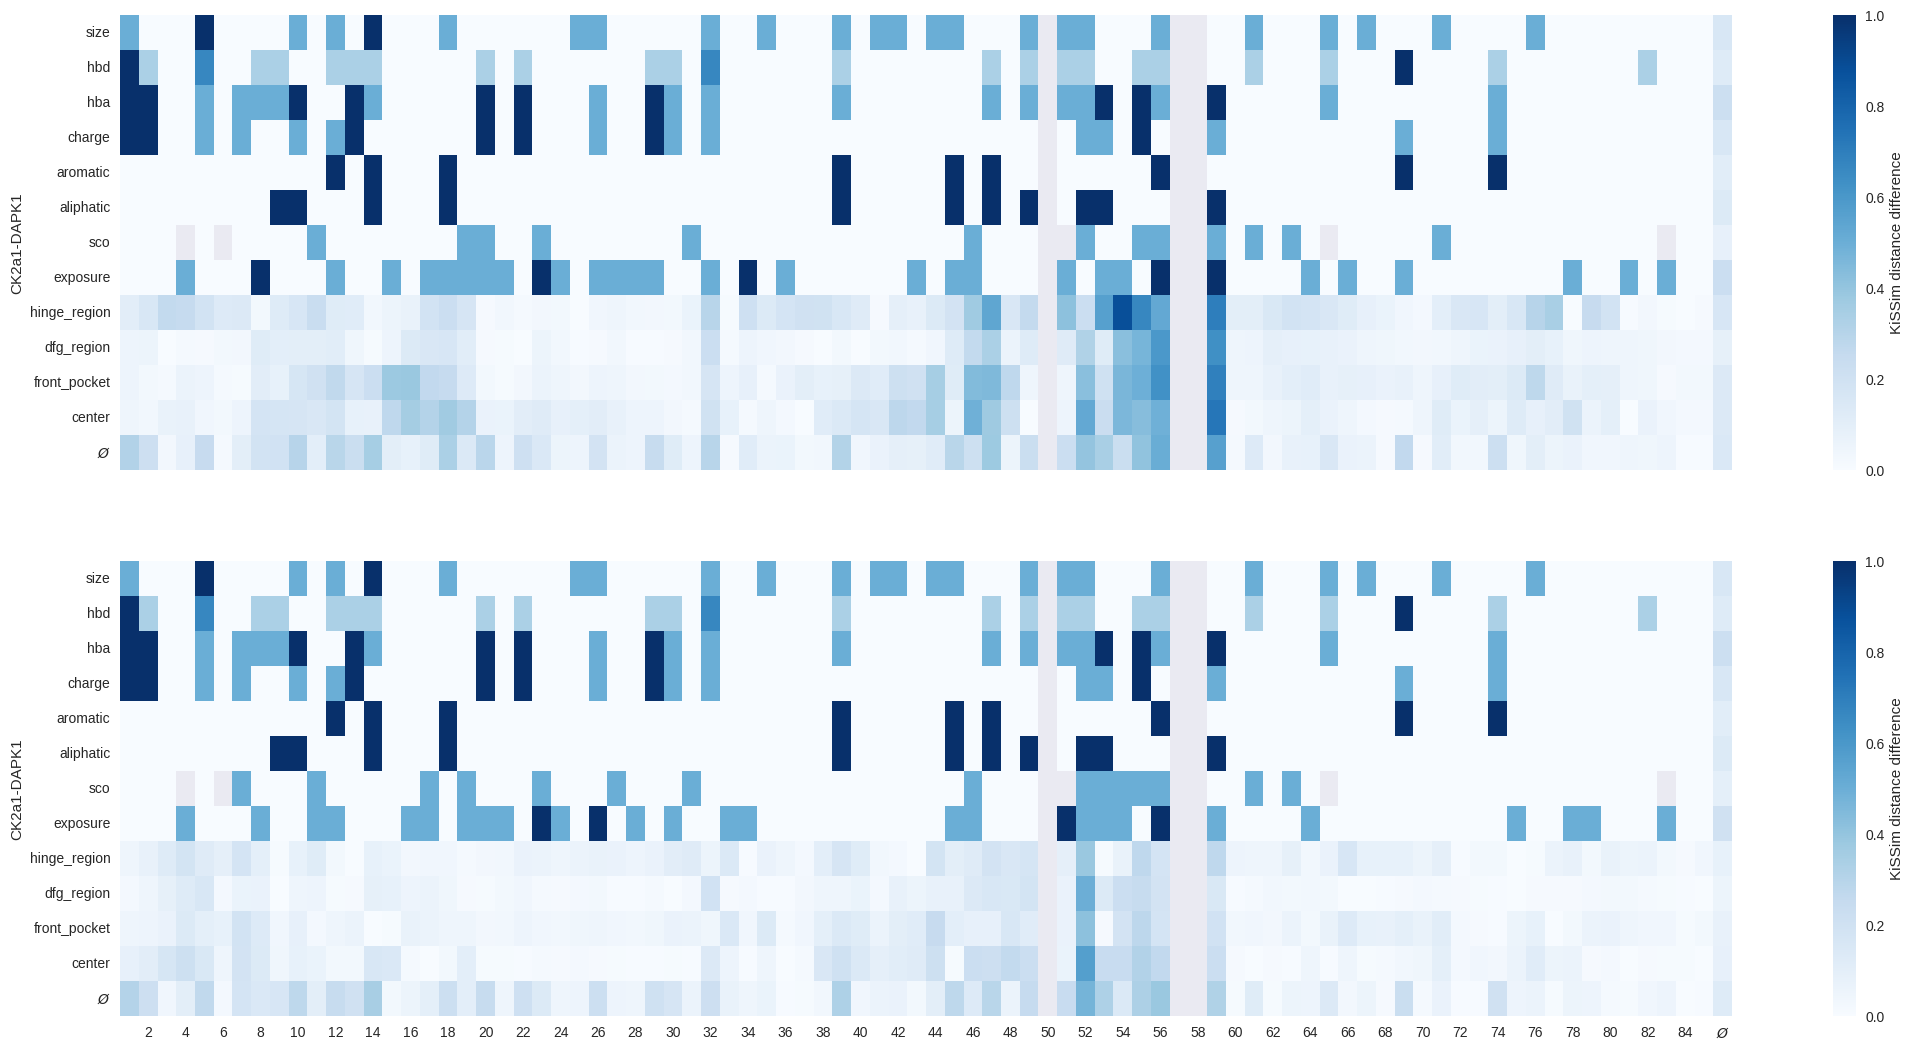

In [204]:
fig, ax = plt.subplots(2, 1, figsize=(26, 13), sharex=True)
plot_fingerprint_diff(fingerprints, pair_same_ligand, ax[0])
plot_fingerprint_diff(fingerprints, pair_not_same_ligand, ax[1])

In [205]:
#also look at the actual fingerprints
distances_same_ligand_str1 = fingerprints.data[pair_same_ligand["structure.1"]].distances
distances_same_ligand_str2 = fingerprints.data[pair_same_ligand["structure.2"]].distances
#combine these two dfs into one, suffixing the columns
distances_same_ligand = pd.concat([distances_same_ligand_str1, distances_same_ligand_str2], axis=1, keys=['str1', 'str2'], names=['structure'])
#and get diff for all
distances_same_ligand_diff = (distances_same_ligand['str1'] - distances_same_ligand['str2']).abs()
#now get top 5 idxs for each column (biggest differences)
top5_diffs = distances_same_ligand_diff.stack().nlargest(5)
top5_diffs

residue.ix              
54          hinge_region    0.880094
59          center          0.726924
            hinge_region    0.700373
            front_pocket    0.691708
55          hinge_region    0.665019
dtype: float64

In [206]:
#also get the structure.pocket for these structures
pair_same_ligand_struc1_sequence = structures[structures['structure.klifs_id'] == pair_same_ligand['structure.1']]['structure.pocket'].values[0]
pair_same_ligand_struc2_sequence = structures[structures['structure.klifs_id'] == pair_same_ligand['structure.2']]['structure.pocket'].values[0]

pair_not_same_ligand_struc1_sequence = structures[structures['structure.klifs_id'] == pair_not_same_ligand['structure.1']]['structure.pocket'].values[0]
pair_not_same_ligand_struc2_sequence = structures[structures['structure.klifs_id'] == pair_not_same_ligand['structure.2']]['structure.pocket'].values[0]

print(pair_same_ligand_struc1_sequence)
print(pair_same_ligand_struc2_sequence)
print('---')
print(pair_not_same_ligand_struc1_sequence)
print(pair_not_same_ligand_struc2_sequence)

#for both; print % in common (same letter at same position)
def get_percentage_same(struc1,struc2):
    same = 0
    for i in range(len(struc1)):
        if struc1[i] == struc2[i]:
            same += 1
    return same/len(struc1)
print(get_percentage_same(pair_same_ligand_struc1_sequence,pair_same_ligand_struc2_sequence))
print(get_percentage_same(pair_not_same_ligand_struc1_sequence,pair_not_same_ligand_struc2_sequence))

EELGSGQFAVVKKYAAKFIDIEREVSILKEIQPNVITLHEVILILELVAGGELFDFLAEYLHSLQIAHFDLKPENIMLIIDFGLA
RKLGRGKYSEVFEVVVKILKIKREIKILENLRPNIITLADIALVFEHVN_NTDFKQ__LYCHSMGIMHRDVKPHNVMILIDWGLA
---
EELGSGQFAVVKKYAAKFIDIEREVSILKEIQPNVITLHEVILILELVAGGELFDFLAEYLHSLQIAHFDLKPENIMLIIDFGLA
RKLGRGKYSEVFEVVVKILKIKREIKILENLRPNIITLADIALVFEHVN_NTDFKQ__LYCHSMGIMHRDVKPHNVMILIDWGLA
0.4
0.4


In [207]:
print(pair_not_same_ligand_struc2_sequence)
print(pair_same_ligand_struc2_sequence)
print('---')
print(pair_not_same_ligand_struc1_sequence)
print(pair_same_ligand_struc1_sequence)
#and percentage in common
print(get_percentage_same(pair_not_same_ligand_struc1_sequence,pair_same_ligand_struc1_sequence))
print(get_percentage_same(pair_not_same_ligand_struc2_sequence,pair_same_ligand_struc2_sequence))

RKLGRGKYSEVFEVVVKILKIKREIKILENLRPNIITLADIALVFEHVN_NTDFKQ__LYCHSMGIMHRDVKPHNVMILIDWGLA
RKLGRGKYSEVFEVVVKILKIKREIKILENLRPNIITLADIALVFEHVN_NTDFKQ__LYCHSMGIMHRDVKPHNVMILIDWGLA
---
EELGSGQFAVVKKYAAKFIDIEREVSILKEIQPNVITLHEVILILELVAGGELFDFLAEYLHSLQIAHFDLKPENIMLIIDFGLA
EELGSGQFAVVKKYAAKFIDIEREVSILKEIQPNVITLHEVILILELVAGGELFDFLAEYLHSLQIAHFDLKPENIMLIIDFGLA
1.0
1.0


In [215]:
#structure.klifs_id	is linked to structure.pdb_id in df structures. get the pdb_id for these structures
structure_klifs_id_to_pdb_id = structures.set_index('structure.klifs_id')['structure.pdb_id'].to_dict()
#print out pdb ids of the structures
print(structure_klifs_id_to_pdb_id[pair_same_ligand['structure.1']])
print(structure_klifs_id_to_pdb_id[pair_same_ligand['structure.2']])
print('---')
print(structure_klifs_id_to_pdb_id[pair_not_same_ligand['structure.1']])
print(structure_klifs_id_to_pdb_id[pair_not_same_ligand['structure.2']])

#print name of residues with idx 52 to 60
pair_not_same_ligand_struc2_sequence[52:60],pair_same_ligand_struc1_sequence[52:60]

2xzs
5cvg
---
1ig1
5cqw


('DFKQ__LY', 'LFDFLAEY')